**Welcome to the Emergent Data Cleaning workshop!**

Goal:
- Let's get familiar with Data Cleaning!
- Learn a snippet of Data Visualization skills!
- Break your fear in Data!

Objectives:
- Learning the fundamental functions of Data Cleaning in Python.
- Learning useful data visualization skills that would be essential in Exploratory Data Analysis (EDA).


In [ ]:
# Check your working directory
import os
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# In case you need (or want) to change a working directory, type the following code.
# os.chdir('/NEWWORKINGDIRECTLY')

Current working directory: /content


It is important to make sure that your current working directory is correctly specified. The directory is in which data you would like to import should be.

# **What is *Pandas*? Short Introduction for those not familiar with**

`pandas` is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. Together with `matplotlib` and `seaborn`, `pandas` provides a wide range of opportunities for visual analysis of tabular data.
The main data structures in `pandas` are `Series` and `DataFrame`. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of Series instances. `DataFrames` are great for representing real data: rows correspond to instances (objects, observations, etc.), and columns correspond to features for each of the instances.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np

Download [datasets](https://drive.google.com/drive/folders/1fQ-DGQ6MpEMOhJvaUFjrfuRtEVfxi_Tl?usp=sharing)

We are going to upload the datasets in '**content**' folder.
Check the image and follow the steps.

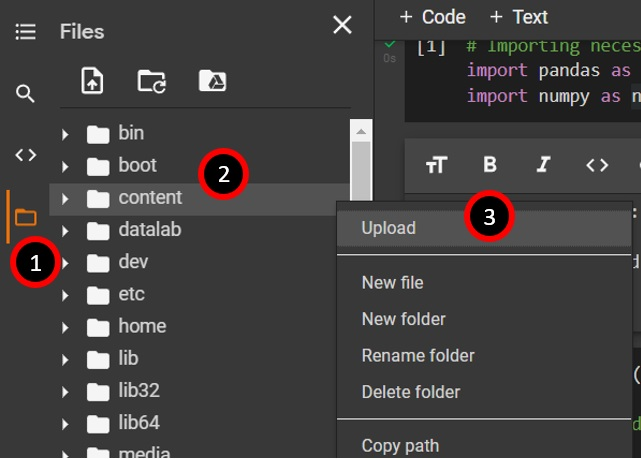



In [ ]:
df = pd.read_csv('/content/avocado.csv') 

# How many records and attributes are there?
print('There are ' + str(df.shape[0]) + ' records')
print('There are ' + str(df.columns.size) + ' attributes:')

# What are the attributes?
data_types = df.dtypes
print(data_types)

# Let's have a look at the first couple of records
df.head()

There are 1014 records
There are 6 attributes:
date          object
type          object
year           int64
avg_price    float64
size          object
nb_sold      float64
dtype: object


,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


The `describe` method shows basic statistical characteristics of each numerical feature in a data frame (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [ ]:
df.describe()

,year,avg_price,nb_sold
count,1014.000000,1014.000000,1.014000e+03
mean,2016.147929,1.319024,4.167774e+06
std,0.940380,0.295168,5.596185e+06
min,2015.000000,0.760000,8.343000e+02
25%,2015.000000,1.040000,1.320755e+05
50%,2016.000000,1.325000,4.232327e+05
75%,2017.000000,1.540000,1.019066e+07
max,2018.000000,2.090000,2.274362e+07


In order to obtain statistics for nominal features, you should explicitly specify that you want to consider the `object` data type. For each nominal feature in the data, you will get the number of non-missing values, unique values count, most common value and the corresponding count:

In [ ]:
df.describe(include=['object'])

,date,type,size
count,1014,1014,1014
unique,169,2,3
top,2016-11-27,organic,small
freq,6,507,338


# **Manipulating DataFrames**


Why would you need to manipulate your data?
- Data may not be structured in the way you would like.
- You do not (normally) need every information in your data.
- You may only need particular observations from your data.

The following examples will be dealing with the aforementioned issues.

##**Indexing DataFrames**

In [ ]:
# Simple dataFrame
df = pd.read_csv('/content/sales.csv', index_col='month') 
df

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


In [ ]:
# Indexing using square brackets
df['salt']['Jan'] 

12.0

In [ ]:
# Using column attribute and row label
df.eggs['Mar'] 

221

*   `loc` is label-based --> You have to specify rows and columns based on their row and column labels.

*   `iloc` is integer position-based --> You have to specify rows and columns by their integer position.

In [ ]:
# Using the .loc accessor
df.loc['May', 'spam']

52

In [ ]:
# Using the .iloc accessor
df.iloc[4, 2] 

52

In [ ]:
# Selecting only some columns
df_new = df[['salt','eggs']] 
df_new

,salt,eggs
month,,
Jan,12.0,47
Feb,50.0,110
Mar,89.0,221
Apr,87.0,77
May,NaN,132
Jun,60.0,205


##**Slicing DataFrames**

In [ ]:
# Selecting a column (i.e., Series)
df['eggs']

In [ ]:
# Slicing and indexing a Series: Part of the eggs column
df['eggs'][1:4]

In [ ]:
# Slicing and indexing a Series: The value associated with May
df['eggs'][4]

In [ ]:
# Using .loc[]: All rows, some columns
df.loc[:, 'eggs':'salt']

In [ ]:
# Using .loc[]: Some rows, all columns
df.loc['Jan':'Apr',:] 

In [ ]:
# Using .loc[]: Some rows, some columns
df.loc['Mar':'May', 'salt':'spam'] 

,salt,spam
month,,
Mar,89.0,72
Apr,87.0,20
May,NaN,52


In [ ]:
# Using .iloc[]: A block from middle of the DataFrame
df.iloc[2:5, 1:]

,salt,spam
month,,
Mar,89.0,72
Apr,87.0,20
May,NaN,52


In [ ]:
# Using lists rather than slices: .loc[]
df.loc['Jan':'May', ['eggs', 'spam']]

,eggs,spam
month,,
Jan,47,17
Feb,110,31
Mar,221,72
Apr,77,20
May,132,52


In [ ]:
# Using lists rather than slices: .iloc[]
df.iloc[[0,4,5], [0:2,4]]

SyntaxError: ignored

# **Filtering DataFrame**

In [ ]:
# Creating a Boolean Series
df.salt > 60 

month
Jan    False
Feb    False
Mar     True
Apr     True
May    False
Jun    False
Name: salt, dtype: bool

In [ ]:
# Filtering with a Boolean Series
enough_salt_sold = df.salt > 60 
df[enough_salt_sold]

,eggs,salt,spam
month,,,
Mar,221,89.0,72
Apr,77,87.0,20


In [ ]:
# Combining filters: Both conditions (And)
df[(df.salt >= 50) & (df.eggs < 200)]

In [ ]:
# Combining filters: Either conditions (Or)
df[(df.salt >= 50) | (df.eggs < 200)]

In [ ]:
# Filtering a column based on another
df.eggs[df.salt > 55] 

In [ ]:
# Modifying a column based on another
df.eggs[df.salt > 55] += 5 
df 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,226,89.0,72
Apr,82,87.0,20
May,132,NaN,52
Jun,210,60.0,55


In [ ]:
# Change one value based on another value in pandas
df.loc[df.eggs == 47, 'spam'] = 23
df

,eggs,salt,spam
month,,,
Jan,47,12.0,23
Feb,110,50.0,31
Mar,226,89.0,72
Apr,82,87.0,20
May,132,NaN,52
Jun,210,60.0,55


## **Encountering missing values**
Are they missing at random or is there a pattern?

In [ ]:
df2 = df.copy() 
df2['bacon'] = [0, 0, 50, 60, 70, 80] 
df2 

In [ ]:
# Select columns with all nonzeros
df2.loc[:, df2.all()] 

In [ ]:
# Select columns with any nonzeros
df2.loc[:, df2.any()]

In [ ]:
# Select columns with any NaNs
df.loc[:, df.isnull().any()]

In [ ]:
# Select columns without NaNs
df.loc[:, df.notnull().all()]

### **Dealing with missing values**

As we briefly saw in the slide, missing values can cause problems or hinder your analysis. Let's look at several ways to deal with the issue.

In [ ]:
# Example 1: Patient data (Missing values follow a pattern)
data = pd.read_csv('/content/patients.csv', na_values=['?'])
data.head()

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,sports,f,24,5.747,194,28.8,fracture,NaN,f,NaN,f,t,NaN,NaN
1,general,m,33,1.640,66,24.9,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
2,general,m,48,1.930,106,28.4,stomach,t,NaN,t,NaN,NaN,NaN,NaN
3,general,f,23,1.540,63,26.8,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
4,general,m,27,1.940,103,27.5,stomach,t,NaN,t,NaN,NaN,NaN,NaN


In [ ]:
# Let's start with the gender attribute.
data[data['gender'].isnull()].describe(include=['object'])

,hospital,gender,diagnosis,blood_test,ecg,ultrasound,mri,xray
count,325,0,325,325,325,325,0,325
unique,1,0,2,1,1,1,0,1
top,prenatal,NaN,pregnancy,t,t,t,NaN,f
freq,325,NaN,313,325,325,325,NaN,325


In [ ]:
# From the table above we can see that gender is only missing for patients in the prenatal hospital. 
# Assuming that all the patients there are female, we can safely replace the missing values.
data['gender'].fillna(value='f', inplace=True)

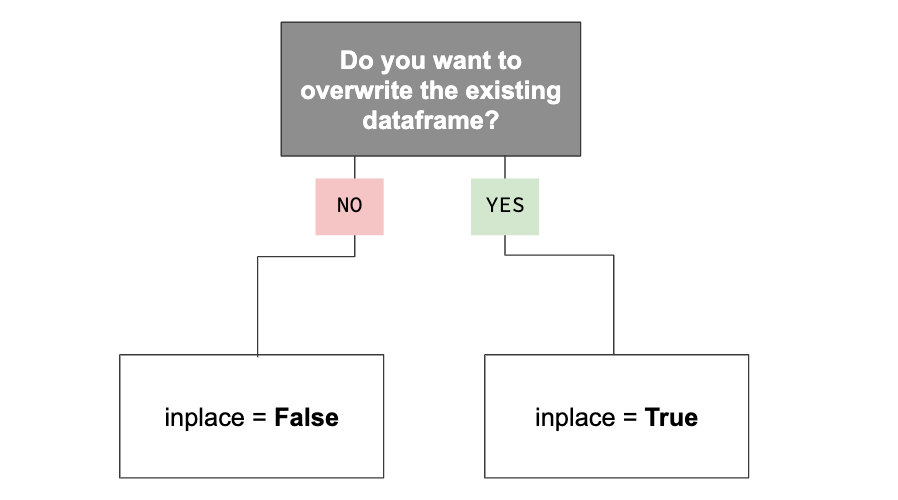

**Question**: What are the other attributes with missing values in the data? Why are they missing? Should these values be filled in or ignored? Why?

**Answer:** The results of medical tests are missing for some patients simply bacause they didn't take these tests. Therefore, it doesn't make sense to fill them in.

In [ ]:
# Example 2: groceries data (random missing)
df = pd.read_csv('/content/sales.csv', index_col='month') 
df

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


In [ ]:
# Drop rows with any NaNs
df.dropna(how='any')

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
Jun,205,60.0,55


# **Summary Tables**


In [ ]:
# Example: Patient data
data = pd.read_csv('/content/patients.csv', na_values=['?'])
data.head()

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,sports,f,24,5.747,194,28.8,fracture,NaN,f,NaN,f,t,NaN,NaN
1,general,m,33,1.640,66,24.9,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
2,general,m,48,1.930,106,28.4,stomach,t,NaN,t,NaN,NaN,NaN,NaN
3,general,f,23,1.540,63,26.8,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
4,general,m,27,1.940,103,27.5,stomach,t,NaN,t,NaN,NaN,NaN,NaN


For categorical (type `object`) features we can use the `value_counts` method to count occurences of each distinct value.

In [ ]:
# Let’s have a look at the distribution of gender
data['gender'].value_counts(normalize=True)

In [ ]:
# Which hospital has the highest number of patients?
data['hospital'].value_counts(normalize=False)

In [ ]:
# Suppose we now want to see how the observations in our sample are distributed in the context of two nominal variables , hospital and gender. 
# To do so, we can build a contingency table using the crosstab method:
pd.crosstab(data['hospital'], data['gender'])

gender,f,m
hospital,,
general,219,242
sports,105,109


**Question:** Construct a similar table to answer the following question: **what share of patients** in the general hospital suffer from stomach-related problems?

**Hint:**
1. *stomach* is one of the observations in which variable?
2. To get percentage instead of the raw counts, play around with **normalize parameter of the `crosstab` function**.

In [ ]:
# Answer:
pd.crosstab(data['hospital'], data['diagnosis'], normalize= 'index')



diagnosis,cold,dislocation,fracture,heart,pregnancy,sprain,stomach
hospital,,,,,,,
general,0.386117,0.054230,0.052061,0.121475,0.010846,0.049892,0.32538
prenatal,0.036923,0.000000,0.000000,0.000000,0.963077,0.000000,0.00000
sports,0.018692,0.285047,0.285047,0.000000,0.000000,0.378505,0.03271


# **Data Visualisation**

Visualisation is the primary way to get a high-level understanding of the data. We use `matplotlib` as the plotting engine, whereas `seaborn` provides a plethora of convenient shortcuts to most common plotting tasks. The following snippet imports these packages.

In [ ]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns

In [ ]:
# Example: Patient data
data = pd.read_csv('/content/patients.csv', na_values=['?'])
data.head()

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,sports,f,24,5.747,194,28.8,fracture,NaN,f,NaN,f,t,NaN,NaN
1,general,m,33,1.640,66,24.9,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
2,general,m,48,1.930,106,28.4,stomach,t,NaN,t,NaN,NaN,NaN,NaN
3,general,f,23,1.540,63,26.8,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
4,general,m,27,1.940,103,27.5,stomach,t,NaN,t,NaN,NaN,NaN,NaN


**Individual attributes**
The basic tool for visualising categorical attributes is a histogram, which shows frequencies of individual values of an attribute. The following plot illusrates the number of patients in different hospitals:

Text(0.5, 1.0, 'The number of patients per hospital')

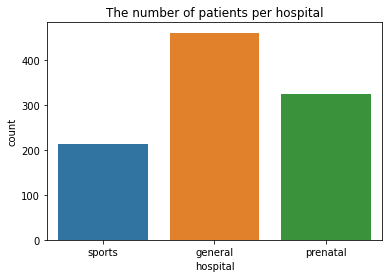

In [ ]:
hist = sns.countplot(x='hospital',data=data)
hist.set_title('The number of patients per hospital')

The distribution of an individual numeric attribute can be discretised and visualised with a histogram using `distplot`.
Let's explore the distribution of the patients' height in our data set:

In [ ]:
sns.distplot(data['height'])

From a statiscal point of view, the graph does not seem **OKAY**. It should have a **normal distribution** but it does not.

**Question:** Looking at the plot above, explain what is the problem with the height measurements in the data set. Fix it, and then look into the distribution again.

**Hint:** to fix the issue, you may need to use `DataFrame.loc[]` indexer.


**Answer:** The heights on the right side of the plot are in a different unit than those on the left side of the plot.
To fix this, we need to convert them to the same unit. We'll do this by converting all heights > 3 from feet to meters (1 foot = 0.3048 meters)

In [ ]:
# Answer:
data.loc[(data['height']>3),'height'] = 0.3048 * data.loc[(data['height']>3),'height']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


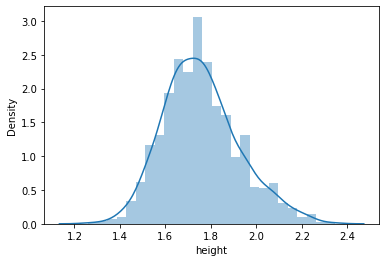

In [ ]:
sns.distplot(data['height'])

## **Pairs of attributes**
Pairwise attribute relationships can be visualised with variations of a scatter plot. Furthermore, the third variable can be brought into the mix via colouring data points.

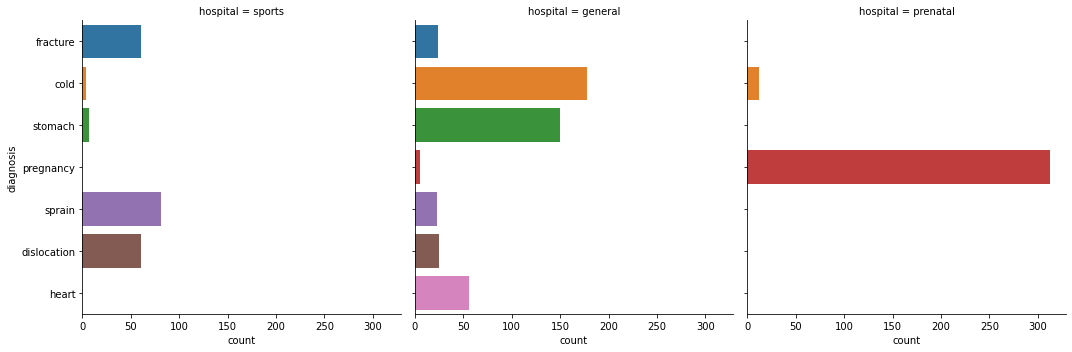

In [ ]:
# We start with visualising a pair of categorical attributes: 'diagnosis' and 'hospital'
sns.catplot(y='diagnosis', col='hospital', data=data, kind='count')

Let's now visualise the patients' weight distribution with respect to the hospital type.

`violinplot` shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

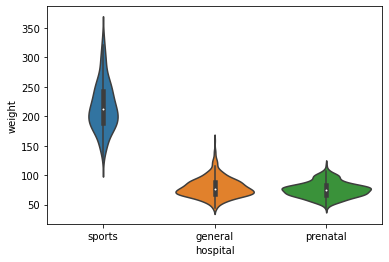

In [ ]:
sns.violinplot(x='hospital',y='weight',data=data)

**Question:** The weight values from the sports hospital seem unnaturally high. What is the problem? Can you fix it?

**Answer:** The weight values of the sports hospital are in a different unit than those of the other hospitals.

To fix this, we need to convert them to the same unit. The weights of the sports are most likely in pounds, while those of the other two hospitals are probably in kilograms. We'll convert the weights of the sports hospital to kilograms by multiplying them by 0.453592.

In [ ]:
#type your code here
pounds_to_kg = 0.453592

# Answer:
data.loc[(data['hospital']=='sports'),'weight'] = pounds_to_kg * data.loc[(data['hospital']=='sports'),'weight']


In [ ]:
sns.violinplot(x='hospital',y='weight',data=data)

Now that the weight and height measures are all in the same units, we can look into their mutual distributuion.

With `jointplot` one can draw a scatter plot of two numerical features along with their univariate distribution.

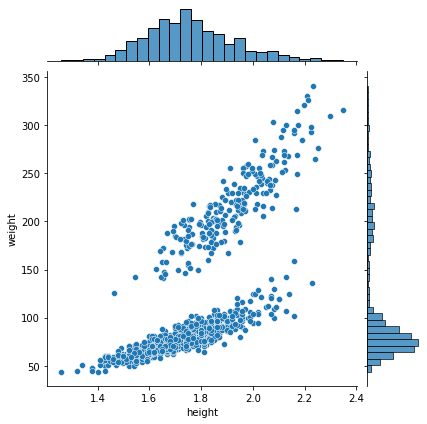

In [ ]:
sns.jointplot(x='height', y='weight', data=data, kind='scatter')

# **Categoricals and groupby**

In [ ]:
# Sales data
sales = pd.DataFrame( 
       { 
        'weekday': ['Sun', 'Sun', 'Mon', 'Mon'], 
        'city': ['Austin', 'Dallas', 'Austin', 'Dallas'], 
        'bread': [139, 237, 326, 456], 
        'butter': [20, 45, 70, 98] 
       } 
) 
 
sales

,weekday,city,bread,butter
0,Sun,Austin,139,20
1,Sun,Dallas,237,45
2,Mon,Austin,326,70
3,Mon,Dallas,456,98


In [ ]:
# Boolean filter and count
sales.loc[sales['weekday'] == 'Sun'].count() 

weekday    2
city       2
bread      2
butter     2
dtype: int64

In [ ]:
# Groupby and count
sales.groupby('weekday').count() 

,city,bread,butter
weekday,,,
Mon,2,2,2
Sun,2,2,2


**Split-apply-combine**
1. Split by weekday
2. Apply `count()` function on each group
3. Combine counts per group

**Aggregation/Reduction**

*   `mean()`
*   `std()`
*   `sum()`
*   `first()`, `last()`
*   `min()`, `max()`




In [ ]:
# Groupby and sum
sales.groupby('weekday')['bread'].sum() 

In [ ]:
# Groupby and sum: multiple columns
sales.groupby('weekday')[['bread','butter']].sum()

In [ ]:
# Groupby and mean: multi-level index
sales.groupby(['city','weekday']).mean()

In [ ]:
# Customers
customers = pd.Series(['Dave','Alice','Bob','Alice']) 

customers

0     Dave
1    Alice
2      Bob
3    Alice
dtype: object

In [ ]:
# Groupby and sum: by series
sales.groupby(customers)['bread'].sum()

Alice    693
Bob      326
Dave     139
Name: bread, dtype: int64

In [ ]:
# Categorical data
sales['weekday'].unique()

array(['Sun', 'Mon'], dtype=object)

In [ ]:
sales['weekday'] = sales['weekday'].astype('category') 
sales['weekday']

0    Sun
1    Sun
2    Mon
3    Mon
Name: weekday, dtype: category
Categories (2, object): ['Mon', 'Sun']

**Advantages of Categorical data**
1.   Uses less memory
2.   Speeds up operations like `groupby()`

## **Groupby and aggregation**

In [ ]:
# Multiple aggregations
sales.groupby('city')[['bread','butter']].agg(['max','sum'])

bread      butter     
         max  sum    max  sum
city                         
Austin   326  465     70   90
Dallas   456  693     98  143

**Aggregation functions**

String names:

*   `sum`
*   `mean`
*   `count`

In [ ]:
# Custom aggregation
def data_range(series): 
     return series.max() - series.min()

In [ ]:
sales.groupby('weekday')[['bread', 'butter']].agg(data_range)

,bread,butter
weekday,,
Mon,130,28
Sun,98,25


In [ ]:
# Custom aggregation: dictionaries
sales.groupby(customers)[['bread', 'butter']].agg({'bread':'sum', 'butter':data_range})

,bread,butter
Alice,693,53
Bob,326,0
Dave,139,0


## **Groupby and transformation**

In [ ]:
def zscore(series): 
    return (series - series.mean()) / series.std()

In [ ]:
# The cars dataset
auto = pd.read_csv('/content/auto-mpg.csv') 
auto.head()

In [ ]:
# MPG z-score
zscore(auto['mpg']).head() 

In [ ]:
# MPG z-score by year
auto.groupby('yr')['mpg'].transform(zscore).head()

In [ ]:
# Apply transformation and aggregation
def zscore_with_year_and_name(group): 
    df = pd.DataFrame( 
        { 
            'mpg': zscore(group['mpg']), 
            'year': group['yr'], 
            'name': group['name'] 
        } 
    ) 
    return df

In [ ]:
auto.groupby('yr').apply(zscore_with_year_and_name).head() 

## **Groupby and filtering**

In [ ]:
# Mean MPG by year
auto.groupby('yr')['mpg'].mean()

In [ ]:
# Groupby object
splitting = auto.groupby('yr') 

# Groupby object: Iteration
for group_name, group in splitting: 
    avg = group['mpg'].mean() 
    print(group_name, avg)

In [ ]:
# Groupby object: Iteration and filtering
for group_name, group in splitting: 
    avg = group.loc[group['name'].str.contains('chevrolet'), 'mpg'].mean() 
    print(group_name, avg)

In [ ]:
# Groupby object: Comprehension
chevy_means = {year:group.loc[group['name'].str.contains('chevrolet'),'mpg'].mean() 
                    for year,group in splitting}   
pd.Series(chevy_means)

In [ ]:
# Boolean groupby
chevy = auto['name'].str.contains('chevrolet') 
auto.groupby(['yr', chevy])['mpg'].mean()

# **Exercise: Exploratory Data Analysis**
In this exercise, we explore the bike rental data set using data manipulation 
and visualisation techniques similar to those seen earlier.

## **Background**

Bike sharing systems enable users to easily rent a bike from a particular position and return it back at another position. Today, there exists a great interest in these systems due to their important role in traffic, environmental and health issues.

## **The dataset**

The data setyou are about to explore is related to the two-year historical log corresponding to the years 2011 and 2012 from the Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. The data has been aggregated on an hourly basis. Besides, the corresponding weather and seasonal information has been added.


Attributes are as follows:

* **Datetime**: date and time, hourly
* **Season**:
    1.   Winter
    2.   Spring
    3.   Summer
    4.   Autumn
* **Holiday**: whether the day is considered a holiday
* **Workingday**: whether the day is neither a weekend nor holiday
* **Weather**:
    1.   Clear, Few clouds, Partly cloudy, Partly cloudy
    2.   Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3.   Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4.   Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* **Temp**: temperature, Celsius
* **Atemp**: "feels like" temperature, Celsius
* **Humidity**: relative humidity
* **Windspeed**: wind speed
* **Casual**: number of non-registered user rentals initiated
* **Registered**: number of registered user rentals initiated
* **Count**: number of total rentals, target variable

## **Loading the data**

In [ ]:
data = pd.read_csv('/content/bikes_train.csv', parse_dates=['datetime'])
print(data.shape)
data.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
print('The data types are: ')
data.dtypes

The data types are: 


datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

**Note:** pandas doesn't automatically recognize some features to be nominal, since they are encoded with numbers (e.g., season, dayofweek, etc.). You can fix this malually using .astype method if needed.

**Question:** Why is this data interesting? What can it be used for?

**Question:** What may affect the bike rental process? What patterns do you expect to discover in the data?

## **Data aggregation**

**Question** Define a new DataFrame `daily_counts` that contains the total number of rentals (casual, registered and total count) for every day in the database, along with mean temperature, windspeed and humidity values for that day. Indicate the day of week and whether the day is a public holiday.

**Hint:** use the `DataFrame.groupby()` and `DataFrame.aggregate()` methods.

use `groupby()`, `aggregate()`
in order to retrieve the date, type `.dt.date`

In [ ]:
# Answer:
daily_counts=data.groupby(data['datetime'].dt.date).aggregate({'holiday':'mean',
                                                               'workingday':'mean',
                                                               'season':'mean',
                                                               'temp':'mean',
                                                               'atemp':'mean',
                                                               'windspeed':'mean',
                                                               'humidity':'mean',
                                                               'registered':'sum',
                                                               'casual':'sum',
                                                               'count':'sum'}, index=False)

daily_counts.reset_index(inplace=True)
daily_counts['datetime']=pd.to_datetime(daily_counts['datetime'])
daily_counts

,datetime,holiday,workingday,season,temp,atemp,windspeed,humidity,registered,casual,count
0,2011-01-01,0,0,1,0.344167,0.363625,0.160446,0.805833,654,331,985
1,2011-01-02,0,0,1,0.363478,0.353739,0.248539,0.696087,670,131,801
2,2011-01-03,0,1,1,0.196364,0.189405,0.248309,0.437273,1229,120,1349
3,2011-01-04,0,1,1,0.200000,0.212122,0.160296,0.590435,1454,108,1562
4,2011-01-05,0,1,1,0.226957,0.229270,0.186900,0.436957,1518,82,1600
...,...,...,...,...,...,...,...,...,...,...,...
451,2012-12-15,0,0,4,0.324167,0.338383,0.106350,0.650417,4280,767,5047
452,2012-12-16,0,0,4,0.362500,0.369938,0.100742,0.838750,3248,538,3786
453,2012-12-17,0,1,4,0.393333,0.401500,0.098258,0.907083,4373,212,4585
454,2012-12-18,0,1,4,0.410833,0.409708,0.221404,0.666250,5124,433,5557


In [ ]:
# Extract day of week, month and year as well.
# Adding day of week
daily_counts['dayofweek']=daily_counts['datetime'].dt.weekday

# Answer:
# Adding month
daily_counts['month']=daily_counts['datetime'].dt.month
# Adding year
daily_counts['year']=daily_counts['datetime'].dt.year

## **Data Exploration**

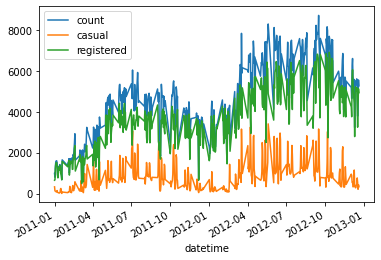

In [ ]:
# Plot the evolution of daily system usage over two years.
daily_counts.plot(x='datetime',y=['count','casual','registered'])

**Questions:** Looking at the plot, answer the following questions:

1.   What is the general trend?
2.   Who uses the system more in general: registered or casual users? Is it always so?

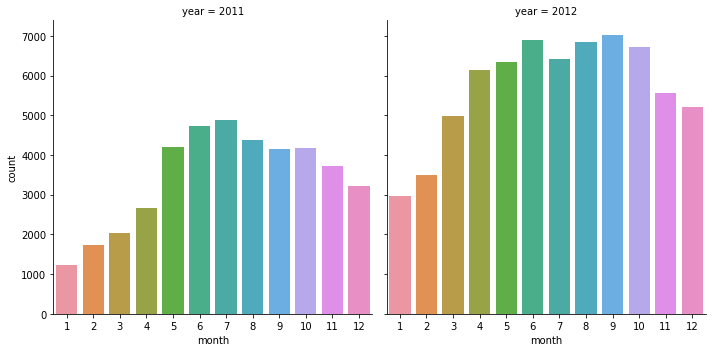

In [ ]:
# Plot the average number of daily bike rentals per month in 2011 and 2012.
sns.catplot(x='month', y='count', col='year', data=daily_counts, kind='bar', ci=False)

In [ ]:
# Do casual and registered users have different bike rental patterns? 
# If so, explain the difference and posible reasons for it. Make plots to justify your answer.

plot=sns.catplot(x='dayofweek',y='registered',col='year',data=daily_counts,kind='bar',ci=False)

In [ ]:
plot=sns.catplot(x='dayofweek',y='casual',col='year',data=daily_counts,kind='bar',ci=False)

**Question**
What are, on average, the busiest hours (in terms of the total number of rentals)? 
Are they the same on working and non-working days? 
Can the same pattern be observed both in 2011 and 2012?

In [ ]:
# Answer:
data['hour']=data['datetime'].dt.hour
data['year']=data['datetime'].dt.year
sns.catplot(x='hour',y='count',hue='workingday',col='year',data=data, kind='point')

**Question:** Define a new variable daytime as follows:
*   5am - 12pm -> morning
*   12pm - 5pm -> afternoon
*   5pm - 9pm -> evening
*   9pm - 5am -> night

**Hint**
1. use if statements

In [ ]:
# Answer:
def get_daytime(data):
    daytime = None
    if ((data['hour']>=5)&(data['hour']<12)):
        daytime = 'morning'
    if ((data['hour']>=12)&(data['hour']<17)):
        daytime = 'afternoon'
    if ((data['hour']>=17)&(data['hour']<21)):
        daytime = 'evening'
    if ((data['hour']>=21)|(data['hour']<5)):
        daytime = 'night'
    return daytime
    
data['daytime'] = data.apply(get_daytime,axis=1)

**Question:** Are the following statements true or false? Make corresponding plots to justify your answer.
*   Casual users rent the highest number of bikes in the afternoon, both on working and non-working days. 
*   The smallest number of bikes is rented during night hours.
*   Registered users rent more bikes on holidays than on working days.

In [ ]:
# Answer:
daily_counts['year'] = daily_counts['datetime'].dt.year
sns.catplot(x='daytime',y='registered',hue='workingday',col='year',data=data, kind='point')

In [ ]:
sns.catplot(x='daytime',y='casual',hue='workingday',col='year',data=data, kind='point')

In [ ]:
sns.catplot(x='holiday',y='registered',col='year',data=daily_counts,kind='bar',ci=False)

**Question:** Is the following statement true or false? Confirm with a plot.

**Statement:** The highest average number of daily bike rentals was recorded on summer days both in 2011 and 2012.

In [ ]:
sns.catplot(x='season',y='casual',col='year',data=daily_counts,kind='bar',ci=False)

**Question:** Do weather conditions affect bike rental patterns of registered users? Casual users? 

Make plots to justify your answer and try to explain the reason for what you see.

In [ ]:
sns.catplot(x='hour',y='registered',hue='weather',col='year',data=data, kind='point')

In [ ]:
sns.factorplot(x='hour',y='casual',hue='weather',col='year',data=data)

**Question:** Speaking about the weather, let's see what's the weather like in Washington. Plot the distribution of the temperature over the seasons.

In [ ]:
sns.factorplot(x='season',y='temp',col='year',data=daily_counts,kind='violin')

In [ ]:
sns.jointplot(x='temp', y='windspeed', data=daily_counts, kind='scatter')

In [ ]:
sns.jointplot(x='temp', y='count',data=daily_counts, kind='scatter')

In [ ]:
sns.jointplot(x='windspeed', y='count',data=daily_counts, kind='scatter')

In [ ]:
sns.jointplot(x='humidity', y='count',data=daily_counts, kind='scatter')

## Well done! You have successfully finished the Emergent Data Cleaning Workshop!

Thank you for participating in the workshop again, and we wish you the best during your Data career!

Note: The workshop is inspired by
- Manipulating Dataframes with Pandas, *Datacamp*
- Data Mining course, *KU Leuven*